# Used Bikes Price Prediction

*This dataset contains the records of used bike prices in India. The data has been collected from one of the leading online portal.
*

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

In [77]:
df1 = pd.read_csv("./Used_Bikes.csv")
df1.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [78]:
df1.shape

(32648, 8)

In [79]:
df1.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [80]:
df2=df1.drop(['power','brand','city'],axis=1)
df2.head()

,bike_name,price,kms_driven,owner,age
0,TVS Star City Plus Dual Tone 110cc,35000.0,17654.0,First Owner,3.0
1,Royal Enfield Classic 350cc,119900.0,11000.0,First Owner,4.0
2,Triumph Daytona 675R,600000.0,110.0,First Owner,8.0
3,TVS Apache RTR 180cc,65000.0,16329.0,First Owner,4.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,10000.0,First Owner,3.0


In [81]:
df2.shape

(32648, 5)

**Checking Null Values**

In [82]:
df2.isna().sum()

bike_name     0
price         0
kms_driven    0
owner         0
age           0
dtype: int64

In [83]:
df2['price']=df2['price'].astype('int32')
df2['kms_driven']=df2['kms_driven'].astype('int32')
df2['age']=df2['age'].astype('int32')
df3=df2.copy()
df3.head()

,bike_name,price,kms_driven,owner,age
0,TVS Star City Plus Dual Tone 110cc,35000,17654,First Owner,3
1,Royal Enfield Classic 350cc,119900,11000,First Owner,4
2,Triumph Daytona 675R,600000,110,First Owner,8
3,TVS Apache RTR 180cc,65000,16329,First Owner,4
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,First Owner,3


# Data Cleaning

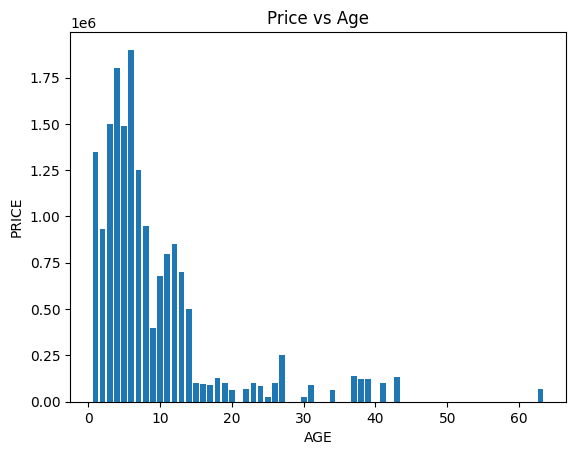

In [84]:
plt.bar(df3['age'],df3['price'])
plt.xlabel('AGE')
plt.ylabel('PRICE')
plt.title('Price vs Age')
plt.show()

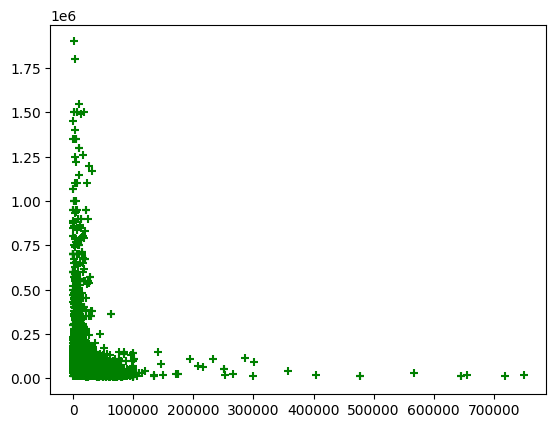

In [85]:
plt.scatter(df3['kms_driven'],df3['price'],marker='+',color='g')
plt.show()

In [86]:
df4=df3.copy()
df4.head()

,bike_name,price,kms_driven,owner,age
0,TVS Star City Plus Dual Tone 110cc,35000,17654,First Owner,3
1,Royal Enfield Classic 350cc,119900,11000,First Owner,4
2,Triumph Daytona 675R,600000,110,First Owner,8
3,TVS Apache RTR 180cc,65000,16329,First Owner,4
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,First Owner,3


# Finding Outliers and Removing

In [87]:
df4['age'].unique()

array([ 3,  4,  8,  6,  7,  5,  2, 16, 13,  9, 10, 14, 12, 11,  1, 15, 39,
       17, 18, 30, 19, 23, 41, 27, 37, 24, 20, 43, 38, 63, 34, 31, 22, 26,
       25], dtype=int32)

In [88]:
df4['age'].describe()


count    32648.000000
mean         8.048211
std          4.031700
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         63.000000
Name: age, dtype: float64

/tmp/ipykernel_64104/3686898277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['age'])


<Axes: xlabel='age', ylabel='Density'>

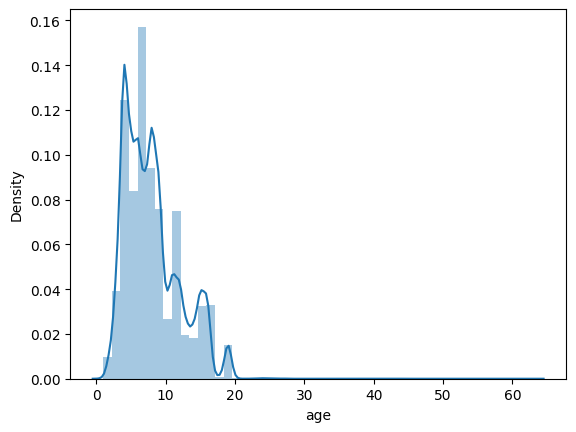

In [89]:
sns.distplot(df4['age'])

<Axes: >

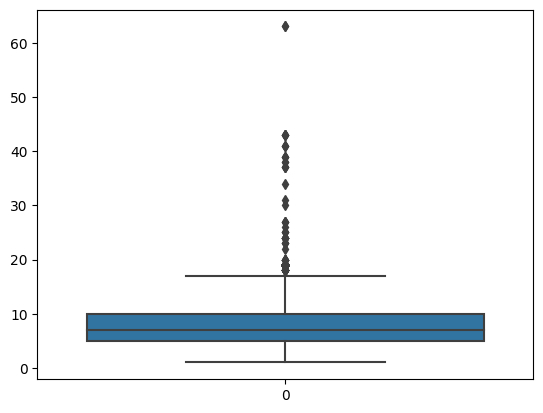

In [90]:
sns.boxplot(df4['age'])

In [91]:
upper_limit=df4['age'].mean()+2.3*df4['age'].std() 
print('upper_limit:',upper_limit)

upper_limit: 17.321121482157235


In [92]:
df4.loc[(df4['age']>upper_limit)]

,bike_name,price,kms_driven,owner,age
334,Royal Enfield Bullet 350 cc,125000,16500,First Owner,39
1033,Bajaj Boxer CT100,11000,21311,First Owner,18
1219,Hero CD 100SS,25500,10000,First Owner,30
1278,Royal Enfield Bullet 350cc,130000,6600,First Owner,18
1298,Hero Splendor 100cc,21000,24000,Second Owner,19
...,...,...,...,...,...
32547,Hero Passion 100cc,15000,35000,Second Owner,19
32566,Hero Passion 100cc,15000,35000,Second Owner,19
32585,Hero Passion 100cc,15000,35000,Second Owner,19
32604,Hero Passion 100cc,15000,35000,Second Owner,19


In [93]:
df5=df4.loc[(df4['age']<upper_limit)]
print('Old_Data:',len(df4))
print('New_Data:',len(df5))
print('No.of.outliers:',len(df4)-len(df5))

Old_Data: 32648
New_Data: 31963
No.of.outliers: 685


In [94]:
df5.head(12)

,bike_name,price,kms_driven,owner,age
0,TVS Star City Plus Dual Tone 110cc,35000,17654,First Owner,3
1,Royal Enfield Classic 350cc,119900,11000,First Owner,4
2,Triumph Daytona 675R,600000,110,First Owner,8
3,TVS Apache RTR 180cc,65000,16329,First Owner,4
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,First Owner,3
5,Yamaha FZs 150cc,53499,25000,First Owner,6
6,Honda CB Hornet 160R ABS DLX,85000,8200,First Owner,3
7,Hero Splendor Plus Self Alloy 100cc,45000,12645,First Owner,3
8,Royal Enfield Thunderbird X 350cc,145000,9190,First Owner,3
9,Royal Enfield Classic Desert Storm 500cc,88000,19000,Second Owner,7


<Axes: >

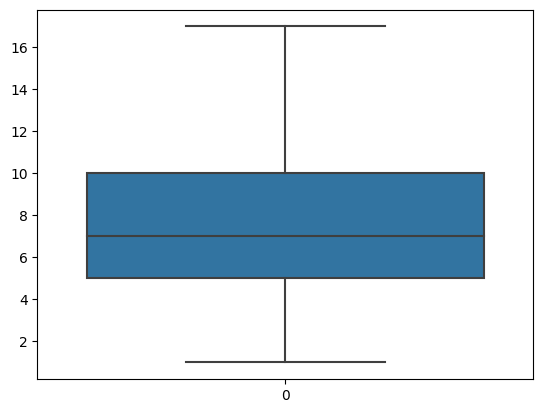

In [95]:
sns.boxplot(df5['age'])

In [96]:
df5.head(10)

,bike_name,price,kms_driven,owner,age
0,TVS Star City Plus Dual Tone 110cc,35000,17654,First Owner,3
1,Royal Enfield Classic 350cc,119900,11000,First Owner,4
2,Triumph Daytona 675R,600000,110,First Owner,8
3,TVS Apache RTR 180cc,65000,16329,First Owner,4
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,First Owner,3
5,Yamaha FZs 150cc,53499,25000,First Owner,6
6,Honda CB Hornet 160R ABS DLX,85000,8200,First Owner,3
7,Hero Splendor Plus Self Alloy 100cc,45000,12645,First Owner,3
8,Royal Enfield Thunderbird X 350cc,145000,9190,First Owner,3
9,Royal Enfield Classic Desert Storm 500cc,88000,19000,Second Owner,7


In [97]:
df5['kms_driven'].max()

750000

<Axes: >

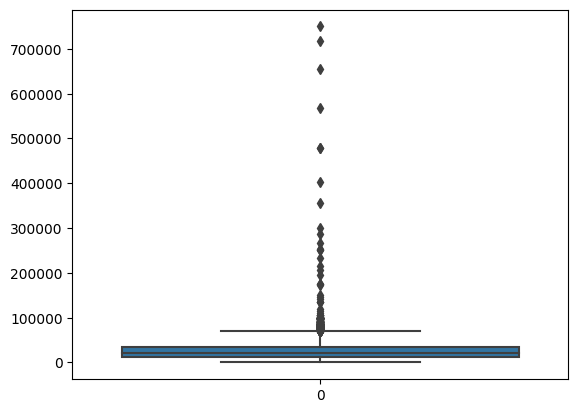

In [98]:
sns.boxplot(df5['kms_driven'])

In [99]:
upper_limit_1=df5['kms_driven'].mean()+3.4*df5['kms_driven'].std()
print('upper_limit_1:',upper_limit_1)

upper_limit_1: 100071.41345750711


In [100]:
df5.loc[(df5['kms_driven']>upper_limit_1)]

,bike_name,price,kms_driven,owner,age
50,Yamaha FZ 150cc,40000,357000,First Owner,8
57,Yamaha SZ 150cc,25000,172082,First Owner,9
589,Honda CB Unicorn Dazzler 150cc,16800,134200,First Owner,10
955,Hero Karizma R 223cc,27000,101250,Third Owner,14
1244,Hero Karizma R 223cc,27000,101250,Third Owner,14
1280,Bajaj CT 100 100cc,10600,107000,First Owner,16
1872,Honda Dream Yuga 110cc,30000,105500,First Owner,8
2112,Honda Dream Yuga 110cc,30000,105500,First Owner,8
2658,Bajaj Discover 125cc,13000,135000,First Owner,10
2759,Royal Enfield Thunderbird 350cc,110000,100670,First Owner,5


In [101]:
df6=df5.loc[(df5['kms_driven']<upper_limit_1)]
print('Old_Data_1:',len(df5))
print('New_Data_1:',len(df6))
print('No.of.outliers_1:',len(df5)-len(df6))

Old_Data_1: 31963
New_Data_1: 31924
No.of.outliers_1: 39


In [102]:
df6['kms_driven']

0        17654
1        11000
2          110
3        16329
4        10000
         ...  
32643    22000
32644     6639
32645    20373
32646    84186
32647    60857
Name: kms_driven, Length: 31924, dtype: int32

In [103]:
df6.head(10)

,bike_name,price,kms_driven,owner,age
0,TVS Star City Plus Dual Tone 110cc,35000,17654,First Owner,3
1,Royal Enfield Classic 350cc,119900,11000,First Owner,4
2,Triumph Daytona 675R,600000,110,First Owner,8
3,TVS Apache RTR 180cc,65000,16329,First Owner,4
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,First Owner,3
5,Yamaha FZs 150cc,53499,25000,First Owner,6
6,Honda CB Hornet 160R ABS DLX,85000,8200,First Owner,3
7,Hero Splendor Plus Self Alloy 100cc,45000,12645,First Owner,3
8,Royal Enfield Thunderbird X 350cc,145000,9190,First Owner,3
9,Royal Enfield Classic Desert Storm 500cc,88000,19000,Second Owner,7


In [104]:
df6.shape

(31924, 5)

/tmp/ipykernel_64104/4138401387.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df6['price'])


<Axes: xlabel='price', ylabel='Density'>

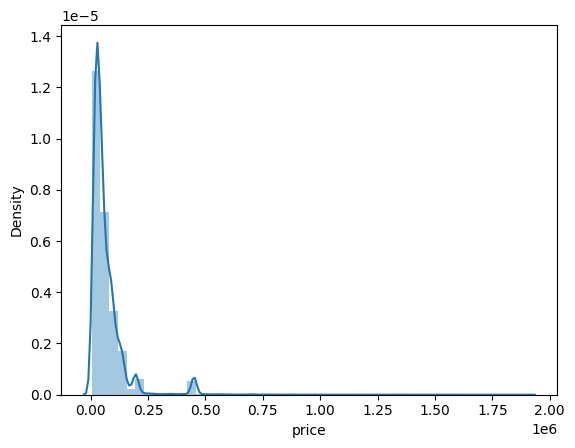

In [105]:
sns.distplot(df6['price'])

<Axes: >

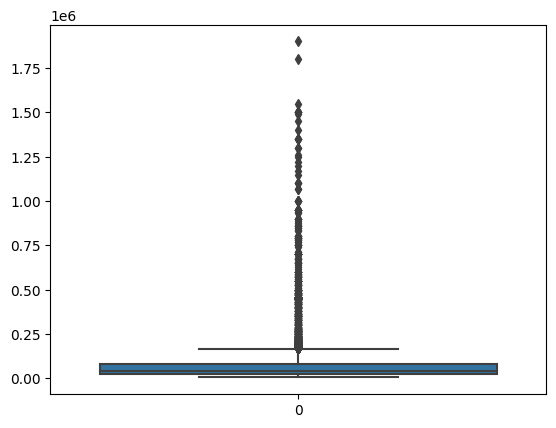

In [106]:
sns.boxplot(df6['price'])

In [107]:
df6['price'].describe()

count    3.192400e+04
mean     6.936156e+04
std      9.139900e+04
min      4.400000e+03
25%      2.500000e+04
50%      4.300000e+04
75%      8.200000e+04
max      1.900000e+06
Name: price, dtype: float64

In [108]:
upper_limit_2=df6['price'].mean()+0.4*df6['price'].std()
print('upper_limit_2:',upper_limit_2)

upper_limit_2: 105921.15687094998


In [109]:
df6.loc[(df6['price']>upper_limit_2)]

,bike_name,price,kms_driven,owner,age
1,Royal Enfield Classic 350cc,119900,11000,First Owner,4
2,Triumph Daytona 675R,600000,110,First Owner,8
8,Royal Enfield Thunderbird X 350cc,145000,9190,First Owner,3
16,Bajaj Pulsar RS200 ABS,120000,23000,First Owner,3
18,Benelli 302R 300CC,240000,15025,Second Owner,3
...,...,...,...,...,...
32600,Yamaha Fazer 25 250cc,123000,14500,First Owner,4
32626,Harley-Davidson Street 750 ABS,450000,3430,First Owner,4
32627,Bajaj Dominar 400 ABS,139000,21300,First Owner,4
32636,KTM RC 390cc,196700,13216,First Owner,4


In [110]:
df7=df6.loc[(df6['price']<upper_limit_2)]
df7.head()

,bike_name,price,kms_driven,owner,age
0,TVS Star City Plus Dual Tone 110cc,35000,17654,First Owner,3
3,TVS Apache RTR 180cc,65000,16329,First Owner,4
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,First Owner,3
5,Yamaha FZs 150cc,53499,25000,First Owner,6
6,Honda CB Hornet 160R ABS DLX,85000,8200,First Owner,3


In [111]:

print('Old_Data_2:',len(df6))
print('New_Data_2:',len(df7))
print('No.of.outliers_2:',len(df6)-len(df7))

Old_Data_2: 31924
New_Data_2: 27412
No.of.outliers_2: 4512


In [112]:
df7['price'].max()

105900

In [113]:
df7['price'].min()

4400

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le_owner=LabelEncoder()

In [116]:
df7['Owner_Type']=le_owner.fit_transform(df7['owner'])
df7.head(5)

/tmp/ipykernel_64104/912226171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Owner_Type']=le_owner.fit_transform(df7['owner'])


,bike_name,price,kms_driven,owner,age,Owner_Type
0,TVS Star City Plus Dual Tone 110cc,35000,17654,First Owner,3,0
3,TVS Apache RTR 180cc,65000,16329,First Owner,4,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,First Owner,3,0
5,Yamaha FZs 150cc,53499,25000,First Owner,6,0
6,Honda CB Hornet 160R ABS DLX,85000,8200,First Owner,3,0


In [117]:
df7['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [118]:
df8=df7.drop(['owner'],axis=1)
df8.head()

,bike_name,price,kms_driven,age,Owner_Type
0,TVS Star City Plus Dual Tone 110cc,35000,17654,3,0
3,TVS Apache RTR 180cc,65000,16329,4,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,3,0
5,Yamaha FZs 150cc,53499,25000,6,0
6,Honda CB Hornet 160R ABS DLX,85000,8200,3,0


In [119]:
df8['Owner_Type'].unique()

array([0, 2, 3, 1])

In [120]:
dummies=pd.get_dummies(df8['bike_name'])
dummies.head(10)

,Bajaj Pulsar 180cc,Bajaj Avenger 150cc,Bajaj Avenger 180cc,Bajaj Avenger 200cc,Bajaj Avenger 220cc,Bajaj Avenger Cruise 220,Bajaj Avenger Cruise 220 ABS,Bajaj Avenger Street 150,Bajaj Avenger Street 160 ABS,Bajaj Avenger Street 180,...,Yamaha SZX 150cc,Yamaha Saluto 125cc,Yamaha Saluto 125cc Disc Special Edition,Yamaha Saluto 125cc-Special Edition,Yamaha Saluto RX 110cc,Yamaha YBR 110cc,Yamaha YZF-R15 150cc,Yamaha YZF-R15 2.0 150cc,Yamaha YZF-R15 S 150cc,Yamaha YZF-R15 V3 150cc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
dummies1=dummies.drop(['Yamaha YZF-R15 V3 150cc'],axis=1)
dummies1

,Bajaj Pulsar 180cc,Bajaj Avenger 150cc,Bajaj Avenger 180cc,Bajaj Avenger 200cc,Bajaj Avenger 220cc,Bajaj Avenger Cruise 220,Bajaj Avenger Cruise 220 ABS,Bajaj Avenger Street 150,Bajaj Avenger Street 160 ABS,Bajaj Avenger Street 180,...,Yamaha SZR 150cc,Yamaha SZX 150cc,Yamaha Saluto 125cc,Yamaha Saluto 125cc Disc Special Edition,Yamaha Saluto 125cc-Special Edition,Yamaha Saluto RX 110cc,Yamaha YBR 110cc,Yamaha YZF-R15 150cc,Yamaha YZF-R15 2.0 150cc,Yamaha YZF-R15 S 150cc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32643,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
df9=pd.concat([df8,dummies1],axis=1)
df9.head()

,bike_name,price,kms_driven,age,Owner_Type,Bajaj Pulsar 180cc,Bajaj Avenger 150cc,Bajaj Avenger 180cc,Bajaj Avenger 200cc,Bajaj Avenger 220cc,...,Yamaha SZR 150cc,Yamaha SZX 150cc,Yamaha Saluto 125cc,Yamaha Saluto 125cc Disc Special Edition,Yamaha Saluto 125cc-Special Edition,Yamaha Saluto RX 110cc,Yamaha YBR 110cc,Yamaha YZF-R15 150cc,Yamaha YZF-R15 2.0 150cc,Yamaha YZF-R15 S 150cc
0,TVS Star City Plus Dual Tone 110cc,35000,17654,3,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,TVS Apache RTR 180cc,65000,16329,4,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,10000,3,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Yamaha FZs 150cc,53499,25000,6,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Honda CB Hornet 160R ABS DLX,85000,8200,3,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
df10=df9.drop(['bike_name'],axis=1)
df10.head()

,price,kms_driven,age,Owner_Type,Bajaj Pulsar 180cc,Bajaj Avenger 150cc,Bajaj Avenger 180cc,Bajaj Avenger 200cc,Bajaj Avenger 220cc,Bajaj Avenger Cruise 220,...,Yamaha SZR 150cc,Yamaha SZX 150cc,Yamaha Saluto 125cc,Yamaha Saluto 125cc Disc Special Edition,Yamaha Saluto 125cc-Special Edition,Yamaha Saluto RX 110cc,Yamaha YBR 110cc,Yamaha YZF-R15 150cc,Yamaha YZF-R15 2.0 150cc,Yamaha YZF-R15 S 150cc
0,35000,17654,3,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,65000,16329,4,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,80000,10000,3,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,53499,25000,6,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,85000,8200,3,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
x=df10.drop(['price'],axis=1)
x.head()

,kms_driven,age,Owner_Type,Bajaj Pulsar 180cc,Bajaj Avenger 150cc,Bajaj Avenger 180cc,Bajaj Avenger 200cc,Bajaj Avenger 220cc,Bajaj Avenger Cruise 220,Bajaj Avenger Cruise 220 ABS,...,Yamaha SZR 150cc,Yamaha SZX 150cc,Yamaha Saluto 125cc,Yamaha Saluto 125cc Disc Special Edition,Yamaha Saluto 125cc-Special Edition,Yamaha Saluto RX 110cc,Yamaha YBR 110cc,Yamaha YZF-R15 150cc,Yamaha YZF-R15 2.0 150cc,Yamaha YZF-R15 S 150cc
0,17654,3,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16329,4,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10000,3,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,25000,6,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,8200,3,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
y=df10['price']
y.head()

0    35000
3    65000
4    80000
5    53499
6    85000
Name: price, dtype: int32

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [127]:
model.score(x_test,y_test)

0.9552987830246213

In [128]:
print(df9['bike_name'])

0          TVS Star City Plus Dual Tone 110cc
3                        TVS Apache RTR 180cc
4        Yamaha FZ S V 2.0 150cc-Ltd. Edition
5                            Yamaha FZs 150cc
6               Honda CB Hornet 160R  ABS DLX
                         ...                 
32643                  Hero Passion Pro 100cc
32644                    TVS Apache RTR 180cc
32645                Bajaj Avenger Street 220
32646               Hero Super Splendor 125cc
32647                      Bajaj Pulsar 150cc
Name: bike_name, Length: 27412, dtype: object


In [129]:
### First owner  =0
### Second owner =2
### Third owner  =3
### Fourth owner =1

In [130]:
location='Bajaj Avenger 150cc'
np.where(x.columns==location)[0][0]

4

In [131]:
def predict_price(location,kms_driven,age,Owner_Type):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns)) 
    X[0] = kms_driven
    X[1] = age
    X[2] = Owner_Type
    if loc_index >= 0:
        X[loc_index] = 1

    return model.predict([X])[0]

In [132]:
df9['bike_name']

0          TVS Star City Plus Dual Tone 110cc
3                        TVS Apache RTR 180cc
4        Yamaha FZ S V 2.0 150cc-Ltd. Edition
5                            Yamaha FZs 150cc
6               Honda CB Hornet 160R  ABS DLX
                         ...                 
32643                  Hero Passion Pro 100cc
32644                    TVS Apache RTR 180cc
32645                Bajaj Avenger Street 220
32646               Hero Super Splendor 125cc
32647                      Bajaj Pulsar 150cc
Name: bike_name, Length: 27412, dtype: object

In [133]:
predict_price('TVS Star City Plus Dual Tone 110cc',25000,8,0)

/home/abhishek/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20714.477904821673

In [134]:
predict_price('TVS Star City Plus Dual Tone 110cc',25000,8,0)

/home/abhishek/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20714.477904821673

In [135]:
predict_price('Yamaha FZs 150cc', 25000, 3, 1)

/home/abhishek/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53306.00077312665

In [136]:
predict_price('Bajaj Pulsar RS200 ABS',12000,1,2)

/home/abhishek/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103349.80921526937

In [137]:
predict_price('Royal Enfield Classic 350cc',15000,2,1)

/home/abhishek/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104929.26276254476